Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 10</span>


In this exercise I extend the GA algortihm from exercise 9 to run on multiple processes and exchange the best individual after a fixed number of generations. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys  # To read the filename from command line

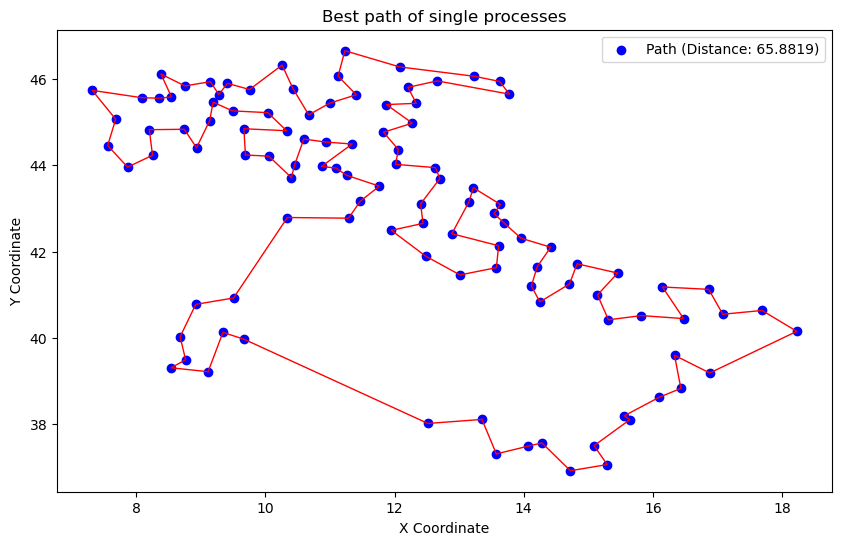

In [27]:
def print_path(filepath, title):
    # Open the file to read the distance from the header
    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith("#Distance:"):
                distance = float(line.split()[1])
                break

    # Using numpy to read the data (skipping the commented header lines)
    data = np.loadtxt(filepath, comments="#")
    
    # Split data into x and y coordinates
    x_coords = data[:, 0]
    y_coords = data[:, 1]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_coords, y_coords, color='blue', label='Cities')
    
    # Connect the points with lines
    plt.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1)
    
    # Connect the last point back to the first
    plt.plot([x_coords[-1], x_coords[0]], [y_coords[-1], y_coords[0]], color='red', linestyle='-', linewidth=1)
    
    # Labels and title
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title)
    
    # Add the distance to the legend
    plt.legend([f"Path (Distance: {distance:.4f})"])
    
    # Show the plot
    plt.show()

def printBest(_dir):
	# load best individual data
	plt.figure(figsize=(10, 6))
	for i in range(11):
		filepath =  _dir + str(i) + "_best_individual.dat" 
		best = np.loadtxt(filepath);
		x = np.linspace(0, len(best), len(best));
		# Create the plot
		plt.plot(x, best, linestyle='-', linewidth=1, label=f"Process {i+1}")
	# Labels and title
	plt.xlabel('generation')
	plt.ylabel('distance')
	plt.title('Best distance')
	plt.legend()
	plt.show()



print_path( "./OUTPUT/independent/bestSalesman.dat", "Best path of single processes")
#printBest("./OUTPUT/independent/")

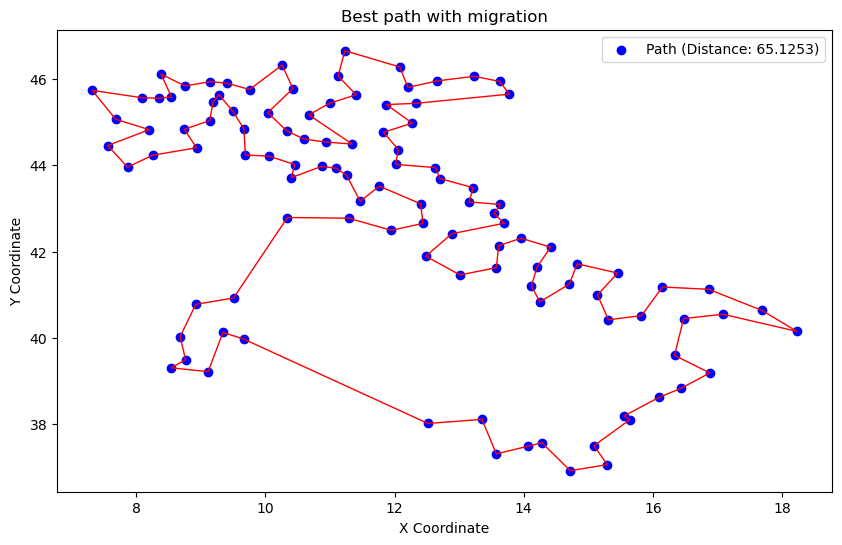

In [28]:
print_path( "./OUTPUT/migration/bestSalesman.dat", "Best path with migration")
#printBest("./OUTPUT/migration/")

The independent and migration processes to converge to similar and decent paths, how fast?

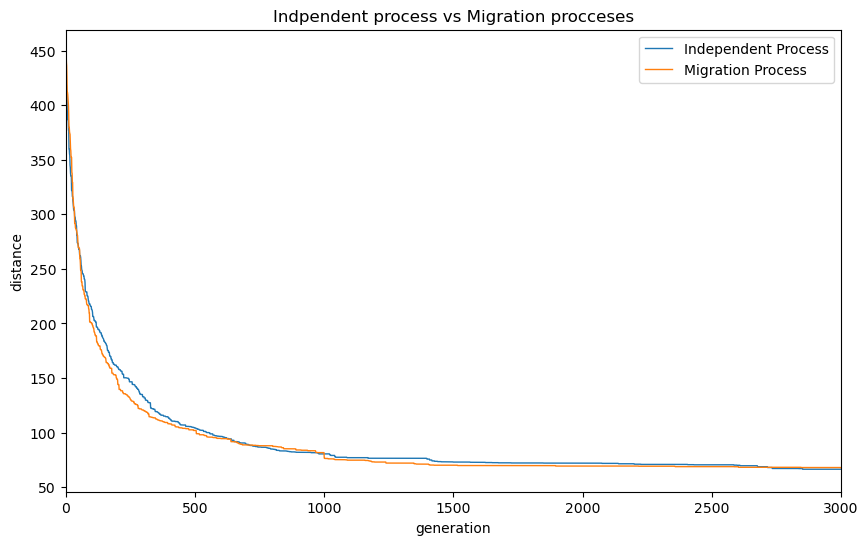

In [36]:
plt.figure(figsize=(10, 6))

filepath =  "./OUTPUT/independent/3_best_individual.dat" # change the number for different simulations
best = np.loadtxt(filepath);
x = np.linspace(0, len(best), len(best));
# Create the plot
plt.plot(x, best, linestyle='-', linewidth=1, label=f"Independent Process")
filepath =  "./OUTPUT/migration/9_best_individual.dat" # change the number for different simulations
best = np.loadtxt(filepath);
x = np.linspace(0, len(best), len(best));
# Create the plot
plt.plot(x, best, linestyle='-', linewidth=1, label=f"Migration Process")
# Labels and title
plt.xlim(0,3000) # not showing the slow/flat portion of the search
plt.xlabel('generation')
plt.ylabel('distance')
plt.title('Indpendent process vs Migration procceses')
plt.legend()
plt.show()

This graph shows that the migration process provided little (to no) help in finding a better solution, converging at similar speeds. This suggests that all procceses converged to the same local minima and quickly started exchanging similar individuals. Possible improvements are to slow down the migration process and to implement a mechanism that makes the newly acquired individual propagate more in the population instead of getting absorbed/killed.